# Análisis de la personalidad del cliente ante una campaña de marketing

Fuente: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/

## **Planteamiento del problema**

El análisis de la personalidad del cliente es un análisis detallado de los clientes ideales de una empresa. Ayuda a una empresa a comprender mejor a sus clientes y le facilita la modificación de los productos en función de las necesidades, comportamientos y preocupaciones específicas de los distintos tipos de clientes.

El análisis de la personalidad del cliente ayuda a una empresa a modificar su producto en función de sus clientes objetivo de diferentes tipos de segmentos de clientes. Por ejemplo, en lugar de gastar dinero en comercializar un nuevo producto a todos los clientes de la base de datos de la empresa, ésta puede analizar qué segmento de clientes tiene más probabilidades de comprar el producto y, a continuación, comercializarlo sólo en ese segmento concreto.

## **Contenido**


## *Personas*

**ID**: Identificador único del cliente

**Year_Birth**: Año de nacimiento del cliente

**Education**: Nivel educativo del cliente

**Marital_Status**: Estado civil del cliente

**Income**: Ingresos anuales del hogar del cliente

**Kidhome**: Número de hijos en el hogar del cliente

**Teenhome**: Número de adolescentes en el hogar del cliente

**Dt_Customer**: Fecha de inscripción del cliente en la empresa

**Recency**: Número de días transcurridos desde la última compra del cliente

**Complain**: 1 si el cliente se ha quejado en los últimos 2 años, 0 en caso contrario

## *Productos*

**MntWines**: Importe gastado en vino en los últimos 2 años

**MntFruits**: Importe gastado en frutas en los últimos 2 años

**MntMeatProducts**: Cantidad gastada en carne en los últimos 2 años

**MntFishProducts**: Cantidad gastada en pescado en los últimos 2 años

**MntSweetProducts**: Cantidad gastada en dulces en los últimos 2 años

**MntGoldProds**: Importe gastado en oro en los últimos 2 años

## *Promoción*

**NumDealsPurchases**: Número de compras realizadas con descuento

**AcceptedCmp1**: 1 si el cliente aceptó la oferta en la 1ª campaña, 0 en caso contrario

**AcceptedCmp2**: 1 si el cliente aceptó la oferta en la 2ª campaña, 0 en caso contrario

**AcceptedCmp3**: 1 si el cliente aceptó la oferta en la 3ª campaña, 0 en caso contrario

**AcceptedCmp4**: 1 si el cliente aceptó la oferta en la 4ª campaña, 0 en caso contrario

**AcceptedCmp5**: 1 si el cliente aceptó la oferta en la 5ª campaña, 0 en caso contrario

**Response**: 1 si el cliente aceptó la oferta en la última campaña, 0 en caso contrario

## *Lugar*

**NumWebPurchases**: Número de compras realizadas a través de la página web de la empresa

**NumCatalogPurchases**: Número de compras realizadas a través de un catálogo

**NumStorePurchases**: Número de compras realizadas directamente en tiendas

**NumWebVisitsMonth**: Número de visitas a la página web de la empresa en el último mes

### 1- Abrir archivo

In [10]:
"""
# elegimos nombre archivo
import csv

archivo = "/content/marketing_campaign.csv"

# exploramos columnas del archivo
with open(archivo, 'r') as file:
  reader = csv.reader(file)
  print(next(reader))
  print(next(reader))
  print(next(reader))
"""

'\n# elegimos nombre archivo\nimport csv\n\narchivo = "/content/marketing_campaign.csv"\n\n# exploramos columnas del archivo\nwith open(archivo, \'r\') as file:\n  reader = csv.reader(file)\n  print(next(reader))\n  print(next(reader))\n  print(next(reader))\n'

In [11]:
"""
def show_columns_file(file_name):
  '''Función para mostrar columnas de un archivo.
  file_name: nombre de archivo en formato csv
  '''
  with open(file_name, 'r') as file:
    reader = csv.reader(file)
    print(next(reader))

print(show_columns_file(archivo))
"""

"\ndef show_columns_file(file_name):\n  '''Función para mostrar columnas de un archivo.\n  file_name: nombre de archivo en formato csv\n  '''\n  with open(file_name, 'r') as file:\n    reader = csv.reader(file)\n    print(next(reader))\n\nprint(show_columns_file(archivo))\n"

### 2- Abrimos el archivo bien para que no salgan las "t"

In [12]:
import pandas as pd

# URL cruda del archivo CSV en GitHub
url = '../data/raw/marketing_campaign.csv'

# Cargar el archivo CSV en un DataFrame de pandas
df = pd.read_csv(url, delimiter='\t')

# Verificar que se ha cargado correctamente
print(df.head())
print(df.info())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

### 3- Eliminar las columnas Z_CostContact y Z_Revenue
Estas dos columnas tienen el mismo valor en todos los puntos de datos. Por lo tanto, estas dos columnas no son relevantes y pueden eliminarse.

In [13]:
# Eliminar las columnas Z_CostContact y Z_Revenue
df.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True)

# Verificar que las columnas se han eliminado
print("\nDespués de eliminar columnas:")
print(df.info())


Después de eliminar columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDeal

### 4- Guardar nuevo archivo moficado

In [14]:
# Guardar el DataFrame modificado en un nuevo archivo CSV
df.to_csv('../data/interim/01campana_marketing.csv', index=False)

print("Archivo guardado como '01campana_marketing.csv'")

Archivo guardado como '01campana_marketing.csv'


# Transformar Datos

In [15]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv('../data/interim/01campana_marketing.csv')

# Mostrar las primeras 4 filas
print(df.head(4))

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  NumStorePurchases  \
0  04-09-2012       58       635  ...                   10                  4   
1  08-03-2014       38        11  ...                    1                  2   
2  21-08-2013       26       426  ...                    2                 10   
3  10-02-2014       26        11  ...                    0                  4   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0         

# Exploración de datos

In [16]:
# Obtener información sobre el dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [17]:
df["Education"].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

### Realizamos un label encoding en la columna "Education" del DataFrame usando estos los valores específicos:
0 - Basic - Básica

1 - 2n Cycle - Segundo ciclo

2 - Graduation - Licenciatura

3 - Master - Máster

4 - PhD - Doctorado

In [18]:
from sklearn.preprocessing import LabelEncoder
# Crear una instancia del codificador LabelEncoder
encoder = LabelEncoder()

# Definir un mapa de etiquetas para mapear categorías textuales a números
label_map = {"Basic": 0, "2n Cycle": 1, "Graduation": 2, "Master": 3, "PhD": 4}

# Aplicar el mapeo y luego codificar las categorías en la columna "Education"
encoded_education = encoder.fit_transform(df["Education"].map(label_map))

# Reemplazar la columna original "Education" con los valores codificados
df["Education"] = encoded_education

# Imprimir los valores únicos de la columna "Education" después de la codificación
print(df["Education"].unique())

# Imprimir las clases aprendidas por el codificador (es decir, las etiquetas originales mapeadas a números)
print(encoder.classes_)

[2 4 3 0 1]
[0 1 2 3 4]


In [19]:
# OTRA MANERA DE HACERLO

# Crear un diccionario de mapeo
#education_mapping = {'Basic': 0,'2n Cycle': 1,'Graduation': 2,'Master': 3,'PhD': 4}

# Aplicar el mapeo a la columna "Education"
#df['Education'] = df['Education'].map(education_mapping)

# Verificar los cambios
#print(df['Education'].unique())

In [20]:
df["Marital_Status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [21]:
# Contar las ocurrencias de cada categoría en la columna "Marital_Status"
marital_counts = df['Marital_Status'].value_counts()

# Mostrar los resultados
print(marital_counts)

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


### Cambiamos en las filas que contienen Alone a Single. Y eliminamos las filas que contienen Absurd y YOLO (no son más que 4 filas)

In [22]:
# Reemplazar "Alone" por "Single" en la columna "Marital_Status"
df['Marital_Status'] = df['Marital_Status'].replace('Alone', 'Single')

# Eliminar las filas que contienen "Absurd" y "YOLO" en la columna "Marital_Status"
df = df[~df['Marital_Status'].isin(['Absurd', 'YOLO'])]

# Verificar los cambios
print(df['Marital_Status'].unique())

['Single' 'Together' 'Married' 'Divorced' 'Widow']


### Realizamos un label encoding en la columna "Marital_Status" del DataFrame, de manera que 0 es 'Alone' y 1 es 'Together'

In [23]:
# Definir el mapeo de etiquetas según tu requerimiento
label_map = {"Single": 0, "Divorced": 0, "Widow": 0, "Together": 1, "Married": 1}

# Inicializar el codificador de etiquetas
encoder = LabelEncoder()

# Mapear y transformar los valores en la columna "Marital_Status"
df["Marital_Status"] = df["Marital_Status"].map(label_map)

# Ajustar y transformar los valores usando el codificador
encoded_marital_status = encoder.fit_transform(df["Marital_Status"])

# Asignar los valores codificados de vuelta a la columna "Marital_Status" del DataFrame
df["Marital_Status"] = encoded_marital_status

# Verificar los valores únicos después del encoding
print(df["Marital_Status"].unique())

[0 1]


## Ponemos Dt_Customer (object) a un formato de fecha adecuado

In [24]:
# Convertir la columna 'Dt_Customer' a tipo datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# Verificar el cambio
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2236 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2236 non-null   int64         
 1   Year_Birth           2236 non-null   int64         
 2   Education            2236 non-null   int64         
 3   Marital_Status       2236 non-null   int64         
 4   Income               2212 non-null   float64       
 5   Kidhome              2236 non-null   int64         
 6   Teenhome             2236 non-null   int64         
 7   Dt_Customer          2236 non-null   datetime64[ns]
 8   Recency              2236 non-null   int64         
 9   MntWines             2236 non-null   int64         
 10  MntFruits            2236 non-null   int64         
 11  MntMeatProducts      2236 non-null   int64         
 12  MntFishProducts      2236 non-null   int64         
 13  MntSweetProducts     2236 non-null   i

In [25]:
print(df['Dt_Customer'].describe())
print(df['Dt_Customer'].head())

count                             2236
mean     2013-07-10 15:56:21.037566976
min                2012-07-30 00:00:00
25%                2013-01-17 00:00:00
50%                2013-07-09 00:00:00
75%                2013-12-30 06:00:00
max                2014-06-29 00:00:00
Name: Dt_Customer, dtype: object
0   2012-09-04
1   2014-03-08
2   2013-08-21
3   2014-02-10
4   2014-01-19
Name: Dt_Customer, dtype: datetime64[ns]


### Pasar de datos datetime para Dt_Customer (Fecha de inscripción del cliente en la empresa) a:
- Days: Siendo el día 0 el máximo de Dt_Customer
- Seniority: Normalizada entre 0 (poca antigüedad) y 1 (más veterano)
### Se crea Seniority que representa el grado de antigüedad del cliente en la empresa

In [26]:
from sklearn.preprocessing import MinMaxScaler

# Convertir las fechas a números (por ejemplo, días desde la fecha mínima)
df['Days'] = (df['Dt_Customer'] - df['Dt_Customer'].min()).dt.days

# Invertir los valores de 'Days' para que las fechas más recientes tengan valores menores
df['Days'] = df['Days'].max() - df['Days']

# Aplicar MinMaxScaler
scaler = MinMaxScaler()
df['Seniority'] = scaler.fit_transform(df[['Days']])

# Mostrar los resultados
print(df[['Dt_Customer', 'Days', 'Seniority']].head())

  Dt_Customer  Days  Seniority
0  2012-09-04   663   0.948498
1  2014-03-08   113   0.161660
2  2013-08-21   312   0.446352
3  2014-02-10   139   0.198856
4  2014-01-19   161   0.230329


#Primer intento de pasar el sueldo Income a número entero, ya que no contiene decimales

In [27]:
print(df['Income'].dtype)

float64


In [28]:
"""
# Convertir la columna 'Income' de float64 a int64
df['Income'] = df['Income'].astype('int64')

# Verificar el cambio
print(df.info())
print(df.head())
print(df['Income'].dtype)
"""

"\n# Convertir la columna 'Income' de float64 a int64\ndf['Income'] = df['Income'].astype('int64')\n\n# Verificar el cambio\nprint(df.info())\nprint(df.head())\nprint(df['Income'].dtype)\n"

Hay valores faltantes (NaN) o valores infinitos (inf) en la columna

# Eliminar filas con valores NaN en Income

In [29]:
# Contar valores faltantes (NaN) en la columna 'Income'
missing_values = df['Income'].isna().sum()

print(f'Número de valores faltantes en la columna Income: {missing_values}')

Número de valores faltantes en la columna Income: 24


Eliminar estas 24 filas implica solo una disminución del 1,07%, lo que es insignificante para la muestra

In [30]:
# Eliminar las filas donde 'Income' es NaN
df.dropna(subset=['Income'], inplace=True)

# Verificar el cambio
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2212 non-null   int64         
 1   Year_Birth           2212 non-null   int64         
 2   Education            2212 non-null   int64         
 3   Marital_Status       2212 non-null   int64         
 4   Income               2212 non-null   float64       
 5   Kidhome              2212 non-null   int64         
 6   Teenhome             2212 non-null   int64         
 7   Dt_Customer          2212 non-null   datetime64[ns]
 8   Recency              2212 non-null   int64         
 9   MntWines             2212 non-null   int64         
 10  MntFruits            2212 non-null   int64         
 11  MntMeatProducts      2212 non-null   int64         
 12  MntFishProducts      2212 non-null   int64         
 13  MntSweetProducts     2212 non-null   i

In [31]:
# Contar los valores con decimales en la columna 'Income'
count_decimals = df['Income'].apply(lambda x: (x - int(x)) != 0).sum()

# Contar los valores sin decimales en la columna 'Income'
count_no_decimals = df.shape[0] - count_decimals

print(f"Número de veces con decimales en 'Income': {count_decimals}")
print(f"Número de veces sin decimales en 'Income': {count_no_decimals}")

Número de veces con decimales en 'Income': 0
Número de veces sin decimales en 'Income': 2212


### Ya que no tiene decimales, pasamos Income al mismo formato que la mayoría de datos

In [32]:
# Convertir la columna 'Income' de float64 a int64
df['Income'] = df['Income'].astype('int64')

# Verificar el cambio
print(df.info())
print(df.head())
print(df['Income'].dtype)

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2212 non-null   int64         
 1   Year_Birth           2212 non-null   int64         
 2   Education            2212 non-null   int64         
 3   Marital_Status       2212 non-null   int64         
 4   Income               2212 non-null   int64         
 5   Kidhome              2212 non-null   int64         
 6   Teenhome             2212 non-null   int64         
 7   Dt_Customer          2212 non-null   datetime64[ns]
 8   Recency              2212 non-null   int64         
 9   MntWines             2212 non-null   int64         
 10  MntFruits            2212 non-null   int64         
 11  MntMeatProducts      2212 non-null   int64         
 12  MntFishProducts      2212 non-null   int64         
 13  MntSweetProducts     2212 non-null   i

In [33]:
# Verificar si hay algún otro valor NaN en todo el DataFrame
print(df.isna().any().any())
# Esto imprimirá True si hay al menos un valor NaN en cualquier parte del DataFrame

False


# Creación de nuevas variables

### Child_Home donde 0 no hay hijos y 1 donde sí hay

In [87]:
df['Child_Home'] = df.apply(lambda x: 1 if (x['Kidhome'] == 1 or x['Teenhome'] == 1) else 0, axis=1)

### AcceptedCmp donde 0 no se ha aceptado ninguna campaña y 1 se ha aceptado al menos 1 de las 5 campañas

In [35]:
df['AcceptedCmp']= df.apply(lambda x: 1 if (x['AcceptedCmp1']==1 or x['AcceptedCmp2']==1 or x['AcceptedCmp3']==1 or x['AcceptedCmp4']==1 or x['AcceptedCmp5']==1) else 0, axis=1)

### Spent que es el total del gasto compuesto por la suma del gasto de las categorías

In [36]:
df['Spent']= df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntGoldProds']+ df['MntSweetProducts']

### Guardar nuevo archivo moficado

In [37]:
# Guardar el DataFrame modificado en un nuevo archivo CSV
df.to_csv('../data/interim/02campana_marketing.csv', index=False)

print("Archivo guardado como '02campana_marketing.csv'")

Archivo guardado como '02campana_marketing.csv'


# EDA

In [38]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv('../data/interim/02campana_marketing.csv')

In [39]:
#Estadísticas básicas de las variables numéricas
df.describe()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Days,Seniority,Child_Home,AcceptedCmp,Spent
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,...,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,5587.731917,1968.811031,2.458409,0.646474,52232.510850,0.442586,0.505425,49.050633,305.030741,26.324593,...,0.072785,0.063743,0.013562,0.009494,0.149638,353.272152,0.505396,0.693490,0.207052,606.711573
std,3247.944128,11.982065,1.004552,0.478172,25187.455359,0.537052,0.544258,28.940794,337.611255,39.781794,...,0.259842,0.244350,0.115691,0.096994,0.356797,202.376279,0.289523,0.461148,0.405285,603.163013
min,0.000000,1893.000000,0.000000,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,2814.750000,1959.000000,2.000000,0.000000,35233.500000,0.000000,0.000000,24.000000,23.750000,1.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.257511,0.000000,0.000000,68.750000
50%,5458.500000,1970.000000,2.000000,1.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,355.000000,0.507868,1.000000,0.000000,396.000000
75%,8421.750000,1977.000000,3.000000,1.000000,68522.000000,1.000000,1.000000,74.000000,505.500000,33.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,529.000000,0.756795,1.000000,0.000000,1047.250000
max,11191.000000,1996.000000,4.000000,1.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,699.000000,1.000000,1.000000,1.000000,2525.000000


In [40]:
#Número de datos faltantes
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
Days                   0
Seniority              0
Child_Home             0
AcceptedCmp            0
Spent                  0
dtype: int64

In [41]:
#Número de datos duplicados
df.duplicated().sum()

np.int64(0)

# Análisis de datos

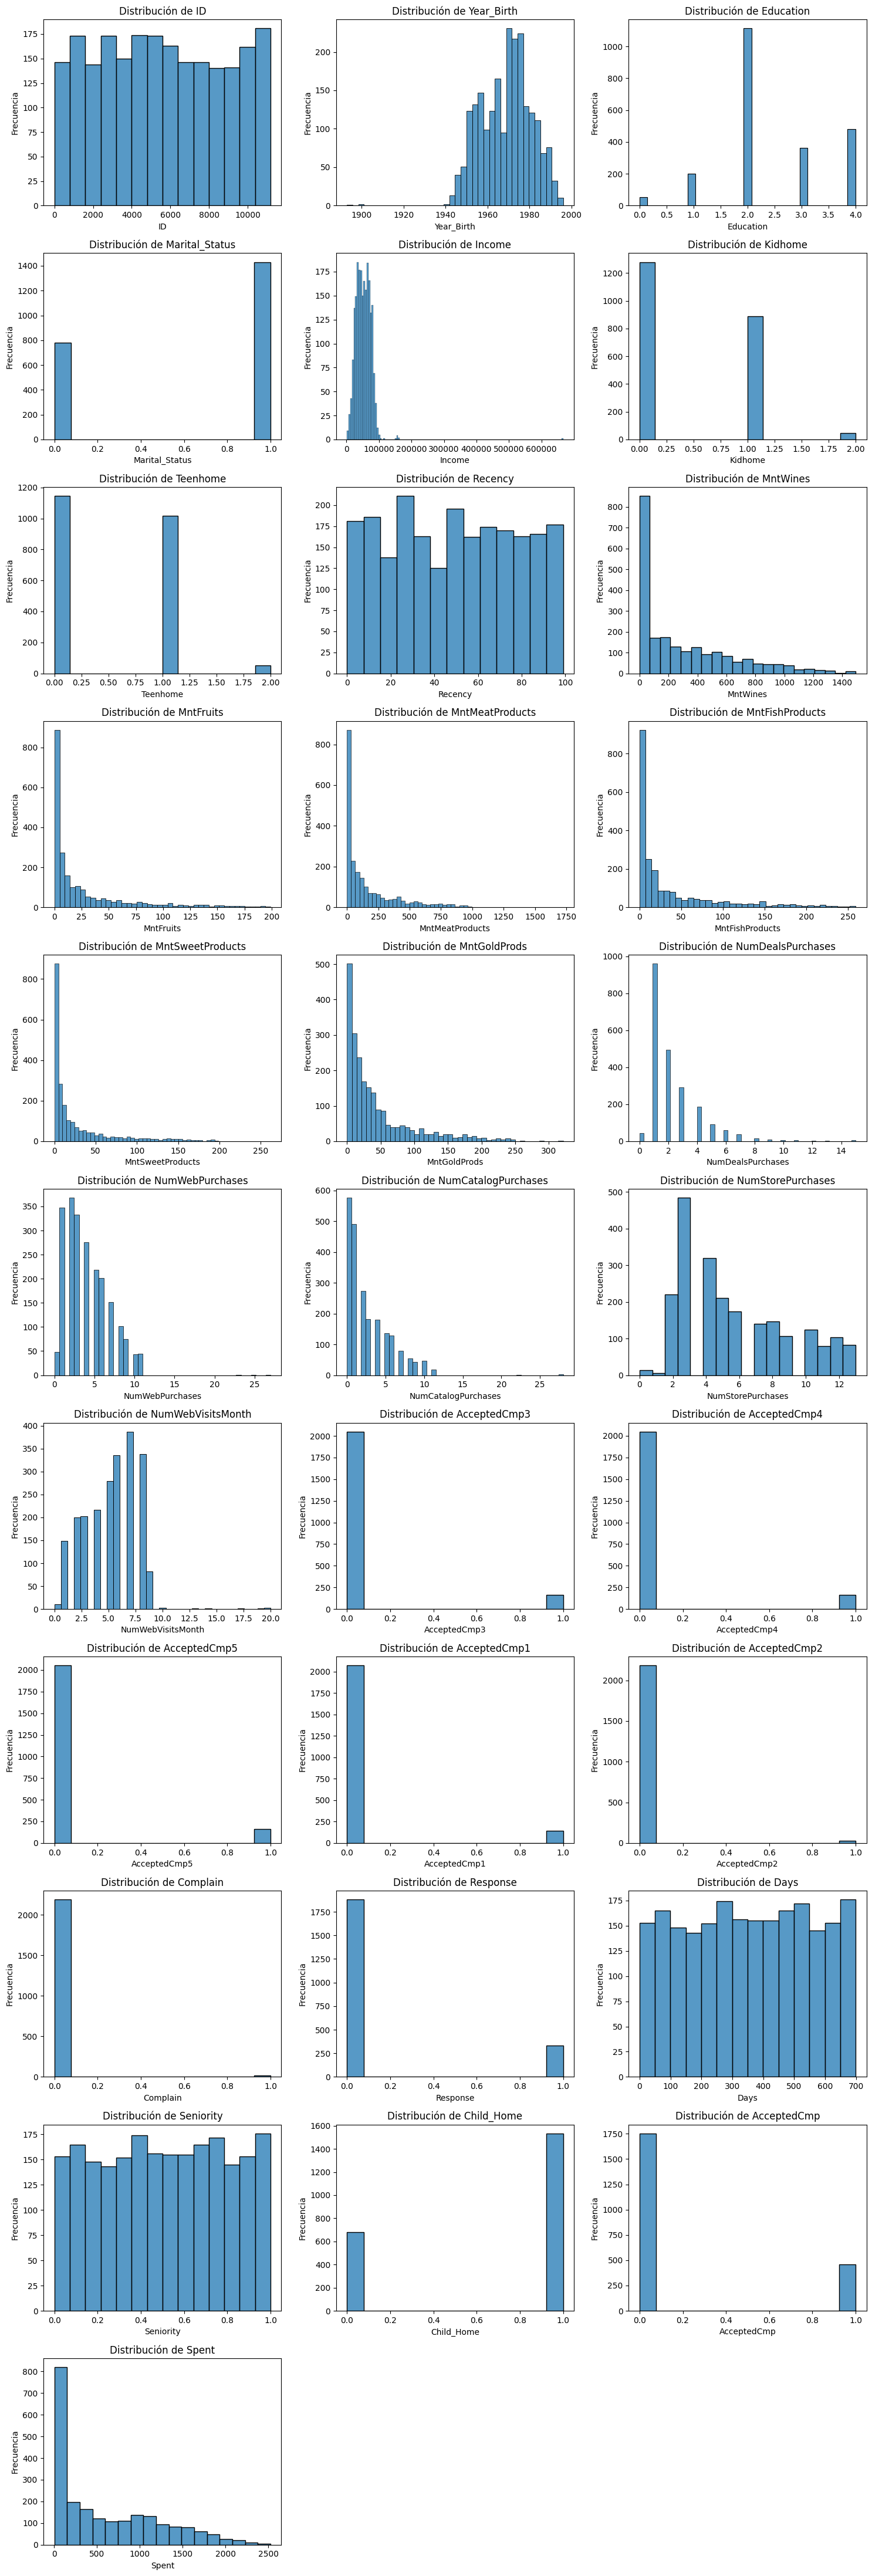

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Histogramas para variables numéricas

# Seleccionar columnas numéricas
num_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Determinar el número de filas y columnas necesario para los subplots
num_plots = len(num_columns)
num_cols = 3
num_rows = math.ceil(num_plots / num_cols)

# Crear los subplots
plt.figure(figsize=(num_cols * 5, num_rows * 4))
for i, col in enumerate(num_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df[col], kde=False)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

Distribución del Número de Campañas Aceptadas por Cliente

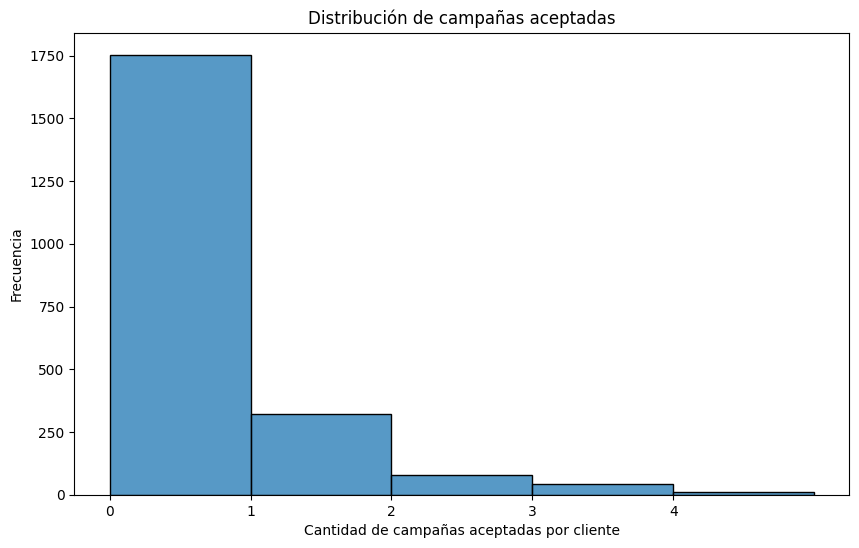

In [43]:
import matplotlib.pyplot as plt

# Seleccionar las columnas de interés
columns_of_interest = [
    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'
]

# Crear un DataFrame solo con estas columnas
df_interest = df[columns_of_interest].copy()

# Crear una nueva columna que sume los valores de 1 en cada fila
df_interest.loc[:, 'Sum_ones'] = df_interest.sum(axis=1)

# Crear el histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_interest['Sum_ones'], bins=range(0, df_interest['Sum_ones'].max() + 2), kde=False)
plt.title('Distribución de campañas aceptadas')
plt.xlabel('Cantidad de campañas aceptadas por cliente')
plt.ylabel('Frecuencia')
plt.xticks(range(0, df_interest['Sum_ones'].max() + 1))
plt.show()

# **En Year_Birt hay años que no son lógicos**

In [44]:
# Filtrar filas donde Year_Birth es inferior a 1940
filas_inferior_1940 = df[df['Year_Birth'] < 1940]

# Mostrar los encabezados y las primeras tres filas
print(filas_inferior_1940.head(3))

        ID  Year_Birth  Education  Marital_Status  Income  Kidhome  Teenhome  \
181   7829        1900          1               0   36640        1         0   
228  11004        1893          1               0   60182        0         1   
326   1150        1899          4               1   83532        0         0   

    Dt_Customer  Recency  MntWines  ...  AcceptedCmp5  AcceptedCmp1  \
181  2013-09-26       99        15  ...             0             0   
228  2014-05-17       23         8  ...             0             0   
326  2013-09-26       36       755  ...             1             0   

     AcceptedCmp2  Complain  Response  Days  Seniority  Child_Home  \
181             0         1         0   276   0.394850           1   
228             0         0         0    43   0.061516           1   
326             0         0         0   276   0.394850           0   

     AcceptedCmp  Spent  
181            0     65  
228            0     22  
326            1   1853  

[3 rows 

**Donde Year_Birth es 1893 y 1899, parece un error al teclear o introducir el dato. Lo pasamos a 1993 y 1999.**

In [45]:
# Reemplazar los valores erróneos
df.loc[df['Year_Birth'] == 1893, 'Year_Birth'] = 1993
df.loc[df['Year_Birth'] == 1899, 'Year_Birth'] = 1999

# Filtrar filas donde Year_Birth es inferior a 1940
filas_inferior_1940 = df[df['Year_Birth'] < 1940]

# Mostrar los encabezados y las primeras tres filas
print(filas_inferior_1940.head(3))

       ID  Year_Birth  Education  Marital_Status  Income  Kidhome  Teenhome  \
181  7829        1900          1               0   36640        1         0   

    Dt_Customer  Recency  MntWines  ...  AcceptedCmp5  AcceptedCmp1  \
181  2013-09-26       99        15  ...             0             0   

     AcceptedCmp2  Complain  Response  Days  Seniority  Child_Home  \
181             0         1         0   276    0.39485           1   

     AcceptedCmp  Spent  
181            0     65  

[1 rows x 32 columns]


**Reemplazamos el dato 1900 del año de nacimiento por la media.**

In [46]:
# Calcular la media de Year_Birth, excluyendo el valor 1900
mean_year_birth = df[df['Year_Birth'] != 1900]['Year_Birth'].mean()

# Reemplazar 1900 con la media calculada
df.loc[df['Year_Birth'] == 1900, 'Year_Birth'] = round(mean_year_birth)

In [47]:
# Mostrar filas con Year_Birth igual a la media después de la corrección
print(df[df['Year_Birth'] == round(mean_year_birth)])

         ID  Year_Birth  Education  Marital_Status  Income  Kidhome  Teenhome  \
24     7892        1969          2               0   18589        0         0   
75     2261        1969          2               1   26304        1         0   
98     2683        1969          2               1   52413        0         2   
110    9862        1969          2               1   21918        1         0   
122    9597        1969          2               1   73448        0         0   
...     ...         ...        ...             ...     ...      ...       ...   
2068   2686        1969          0               1   22390        0         0   
2091   9907        1969          3               1   66476        0         1   
2111    271        1969          2               0   40590        1         1   
2128   7699        1969          2               0   40590        1         1   
2175  10968        1969          2               0   57731        0         1   

     Dt_Customer  Recency  

In [48]:
df['Year_Birth'].max()

np.int64(1999)

Siendo 1999 el valor máximo como año de nacimiento y suponiendo que el cliente ha de tener al menos 18 años para estar inscrito, se deduce que el año actual del DataSet es 2017.

Con esto sacamos la columna Age siendo 2017-1999 = 18

In [49]:
# Crear la columna Age restando Year_Birth de 2017
df['Age'] = 2017 - df['Year_Birth']

# Mostrar las primeras filas para verificar la nueva columna
print(df[['Year_Birth', 'Age']].head())

   Year_Birth  Age
0        1957   60
1        1954   63
2        1965   52
3        1984   33
4        1981   36


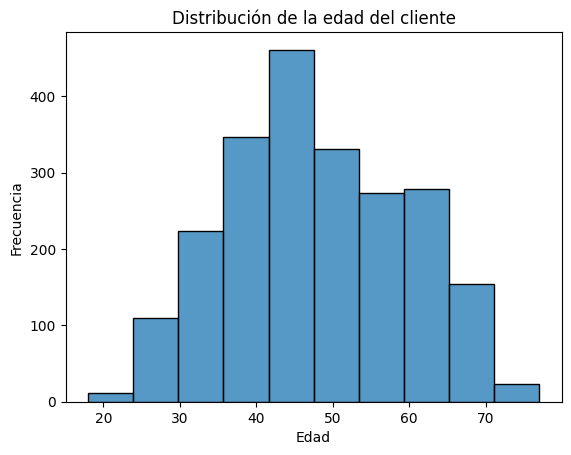

In [50]:
# Crear histograma para Age
plt.title('Distribución de la edad del cliente')
sns.histplot(data= df, x= 'Age', bins=10)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# **Se sospecha que hay datos atípicos (outliers) en Income**

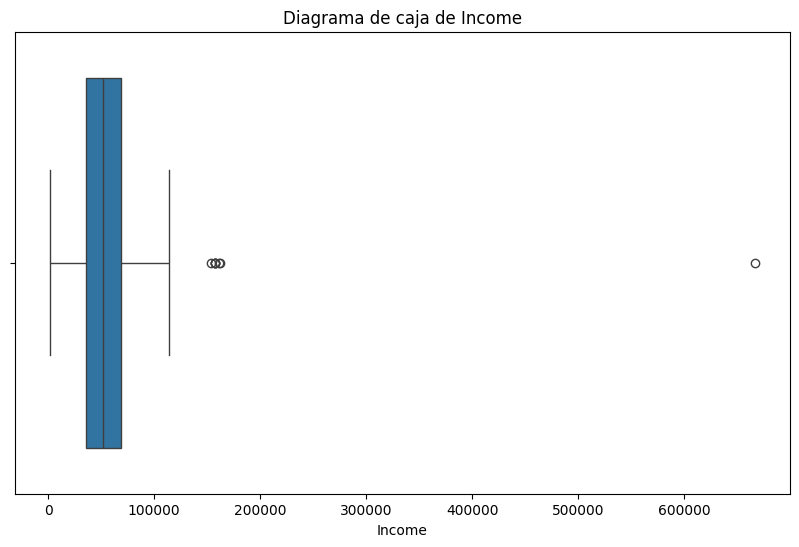

In [51]:
# Crear un diagrama de caja para la columna Income
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Income'])
plt.title('Diagrama de caja de Income')
plt.xlabel('Income')
plt.show()

In [52]:
# Resumen estadístico de la columna Income
resumen = df['Income'].describe()
print(resumen)

# Calcular el rango intercuartílico (IQR)
IQR = resumen['75%'] - resumen['25%']
limite_inferior = resumen['25%'] - 1.5 * IQR
limite_superior = resumen['75%'] + 1.5 * IQR

print(f"Rango Intercuartílico (IQR): {IQR}")
print(f"Límite inferior: {limite_inferior}")
print(f"Límite superior: {limite_superior}")

# Identificar outliers
outliers = df[(df['Income'] < limite_inferior) | (df['Income'] > limite_superior)]
print(f"Número de outliers: {len(outliers)}")
print(outliers)

count      2212.000000
mean      52232.510850
std       25187.455359
min        1730.000000
25%       35233.500000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64
Rango Intercuartílico (IQR): 33288.5
Límite inferior: -14699.25
Límite superior: 118454.75
Número de outliers: 8
         ID  Year_Birth  Education  Marital_Status  Income  Kidhome  Teenhome  \
153    8475        1973          4               1  157243        0         1   
604    1503        1976          4               1  162397        1         1   
642    5555        1975          2               0  153924        0         0   
674    1501        1982          4               1  160803        0         0   
1287   5336        1971          3               1  157733        1         0   
1636   4931        1977          2               1  157146        0         0   
2108  11181        1949          4               1  156924        0         0   
2205   9432        1977   

**Income 666666 es probable que sea un dato inventado por el usuario.
Reemplazamos el valor atípico en la columna Income para el ID 9432 con la media de Income sin contar los outliers**

In [53]:
# Filtrar ingresos válidos (sin outliers)
ingresos_validos = df[(df['Income'] >= limite_inferior) & (df['Income'] <= limite_superior)]

# Calcular la media de los ingresos válidos
media_sin_outliers = ingresos_validos['Income'].mean()

# Reemplazar el valor atípico para el ID 9432 con la media calculada
df.loc[df['ID'] == 9432, 'Income'] = media_sin_outliers

# Verificar el cambio
print(df.loc[df['ID'] == 9432, 'Income'])
print(df['Income'].describe())

2205    51617.73049
Name: Income, dtype: float64
count      2212.000000
mean      51954.460095
std       21530.922239
min        1730.000000
25%       35233.500000
50%       51381.500000
75%       68487.000000
max      162397.000000
Name: Income, dtype: float64


/tmp/ipykernel_2344/1618316270.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '51617.73049001815' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['ID'] == 9432, 'Income'] = media_sin_outliers


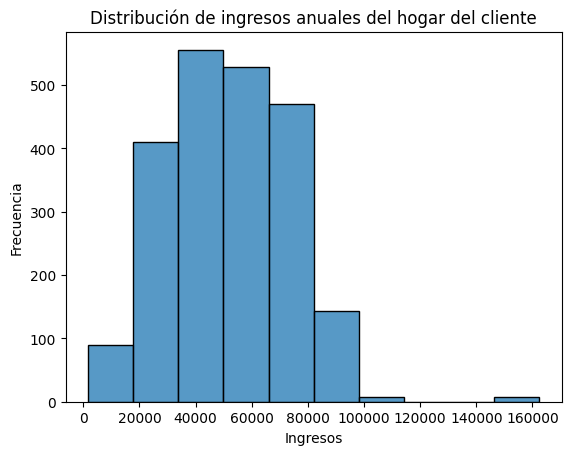

In [54]:
# Crear histograma para Income
plt.title('Distribución de ingresos anuales del hogar del cliente')
sns.histplot(data= df, x= 'Income', bins=10)
plt.xlabel('Ingresos')
plt.ylabel('Frecuencia')
plt.show()

In [55]:
# Guardar el DataFrame modificado en un nuevo archivo CSV
df.to_csv('../data/processed/campana_marketing.csv', index=False)

print("Archivo guardado como 'campana_marketing.csv'")

Archivo guardado como 'campana_marketing.csv'


# EDA con datos ya procesados (características)

In [56]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv('../data/processed/campana_marketing.csv')

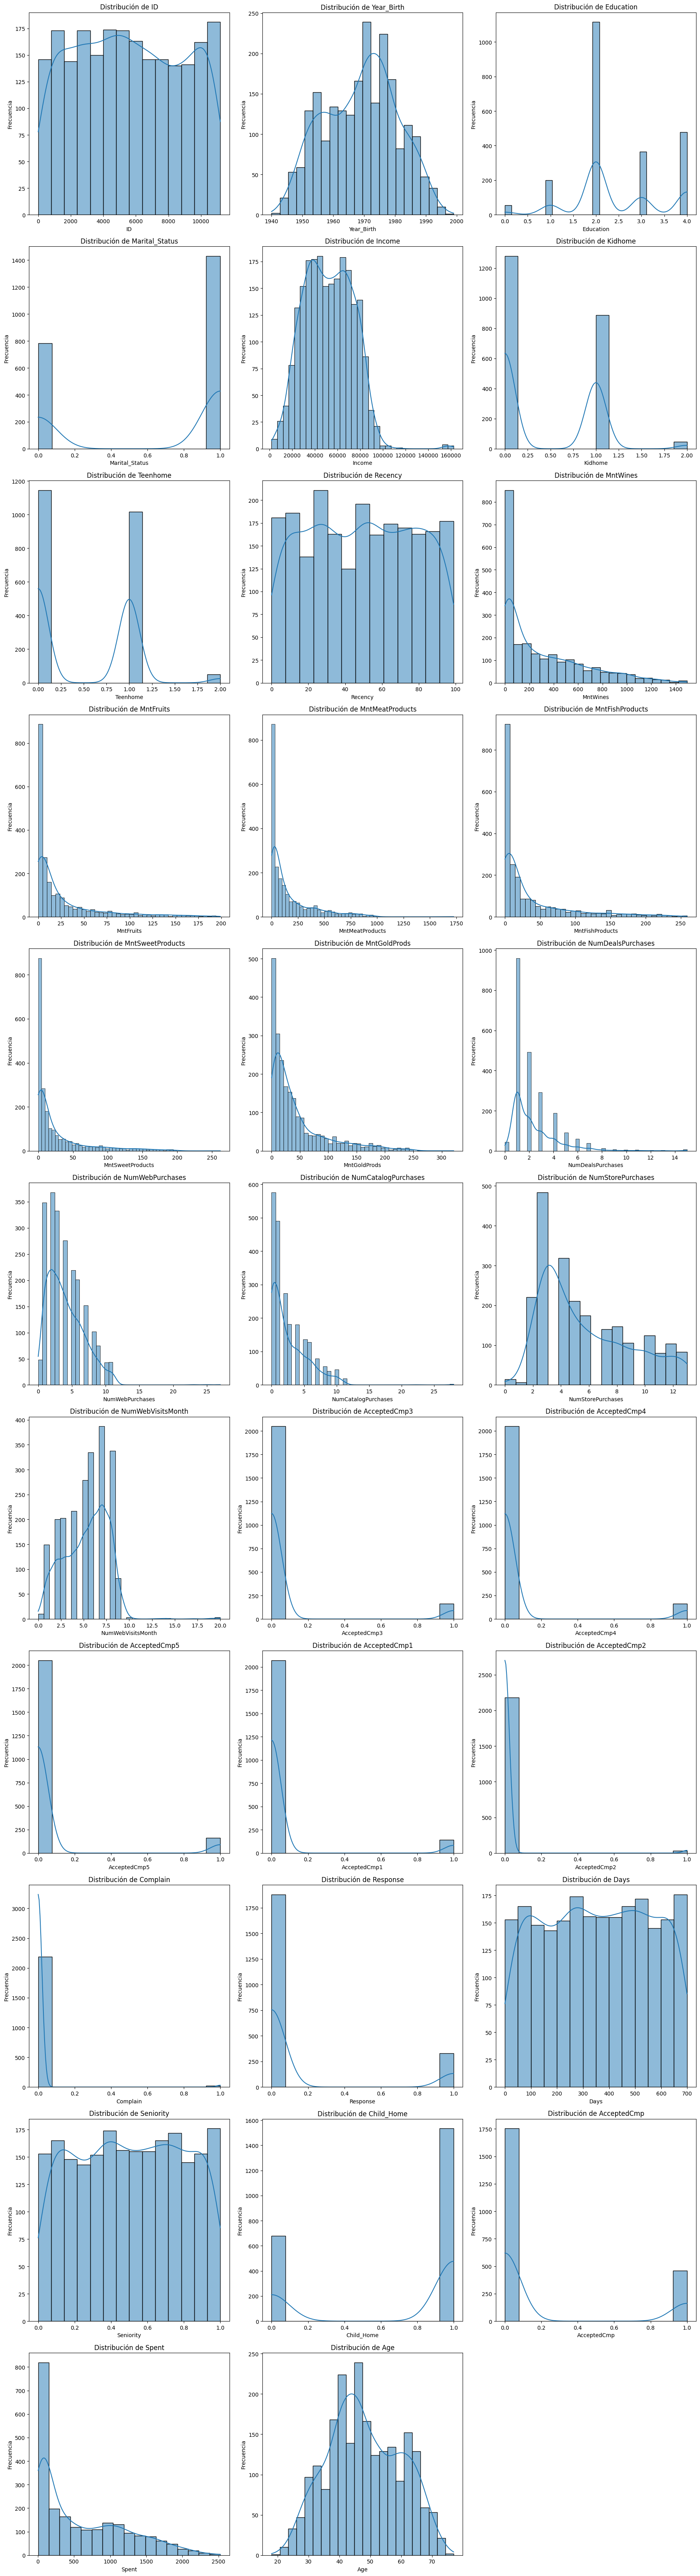

In [57]:
# Histogramas para variables numéricas
# Seleccionar columnas numéricas
num_columns = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = len(num_columns)

# Calcular el número de filas y columnas necesarias para acomodar todas las columnas numéricas
num_rows = (num_cols // 3) + (num_cols % 3 > 0)  # División entera y redondeo hacia arriba

# Configurar el tamaño de la figura
plt.figure(figsize=(18, num_rows * 6))

# Iterar sobre las columnas numéricas para crear histogramas
for i, col in enumerate(num_columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

# Ajustar el layout
plt.tight_layout()
plt.show()

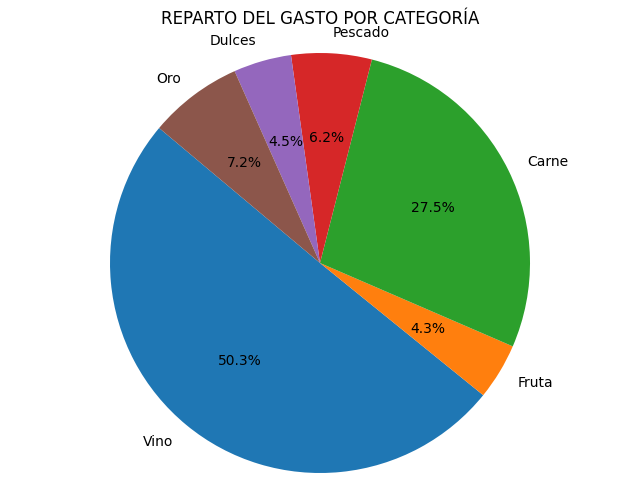

In [58]:
total_spent = df['Spent'].sum()
categories = ['Vino', 'Fruta', 'Carne', 'Pescado', 'Dulces', 'Oro']
spending = [df['MntWines'].sum() / total_spent,
            df['MntFruits'].sum() / total_spent,
            df['MntMeatProducts'].sum() / total_spent,
            df['MntFishProducts'].sum() / total_spent,
            df['MntSweetProducts'].sum() / total_spent,
            df['MntGoldProds'].sum() / total_spent]
plt.figure(figsize=(8, 6))
plt.pie(spending, labels=categories, autopct='%1.1f%%', startangle=140)
plt.title('REPARTO DEL GASTO POR CATEGORÍA')
plt.axis('equal')
plt.show()

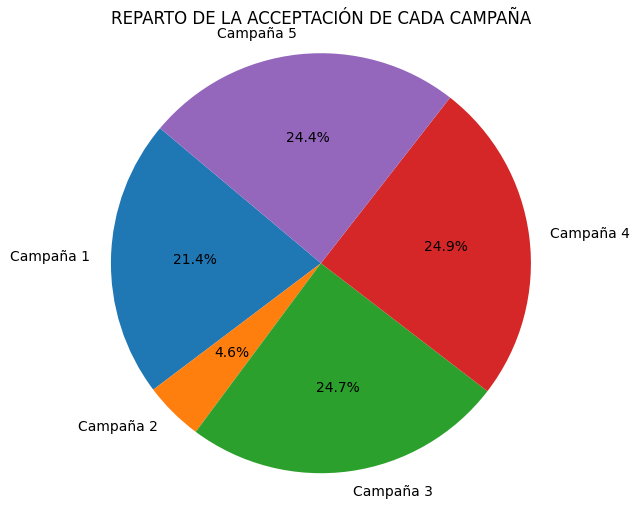

In [59]:
accepted= df['AcceptedCmp'].sum()
cpn = ['Campaña 1', 'Campaña 2', 'Campaña 3', 'Campaña 4', 'Campaña 5']
cpn_pos_reaction = [df['AcceptedCmp1'].sum() / accepted,
            df['AcceptedCmp2'].sum() / accepted,
            df['AcceptedCmp3'].sum() / accepted,
            df['AcceptedCmp4'].sum() / accepted,
            df['AcceptedCmp5'].sum() / accepted,]
plt.figure(figsize=(8, 6))
plt.pie(cpn_pos_reaction, labels=cpn, autopct='%1.1f%%', startangle=140)
plt.title('REPARTO DE LA ACCEPTACIÓN DE CADA CAMPAÑA')
plt.axis('equal')
plt.show()

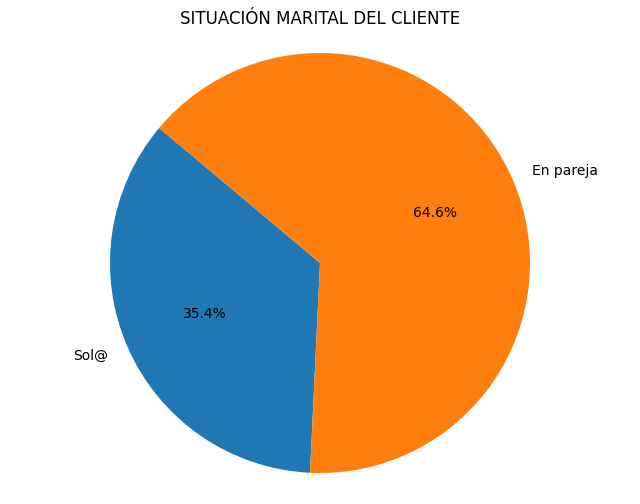

In [60]:
mar_stat= df.groupby('Marital_Status')['ID'].count().reset_index()
tot= df.shape[0]
mar_pie = [mar_stat.loc[0, 'ID'] / tot, mar_stat.loc[1, 'ID'] / tot]
plt.figure(figsize=(8, 6))
plt.pie(mar_pie, labels=['Sol@', 'En pareja'], autopct='%1.1f%%', startangle=140)
plt.title('SITUACIÓN MARITAL DEL CLIENTE')
plt.axis('equal')
plt.show()

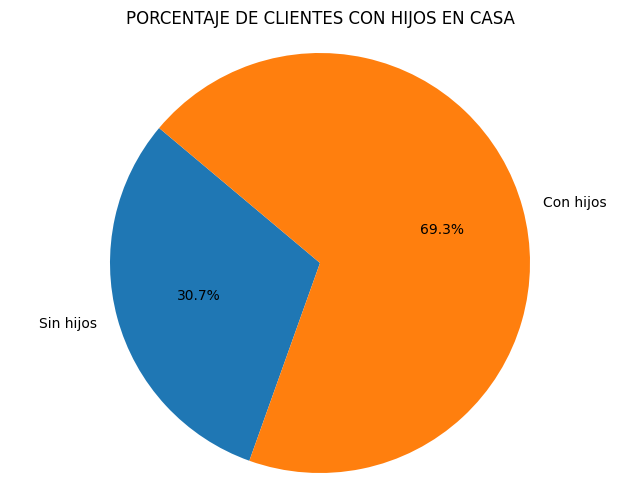

In [61]:
kids_stat= df.groupby('Child_Home')['ID'].count().reset_index()
kids_pie = [kids_stat.loc[0, 'ID'] / tot, kids_stat.loc[1, 'ID'] / tot]
plt.figure(figsize=(8, 6))
plt.pie(kids_pie, labels=['Sin hijos', 'Con hijos'], autopct='%1.1f%%', startangle=140)
plt.title('PORCENTAJE DE CLIENTES CON HIJOS EN CASA')
plt.axis('equal')
plt.show()

**¿Cuántos más hijos, más gasto en dulces? - NO**

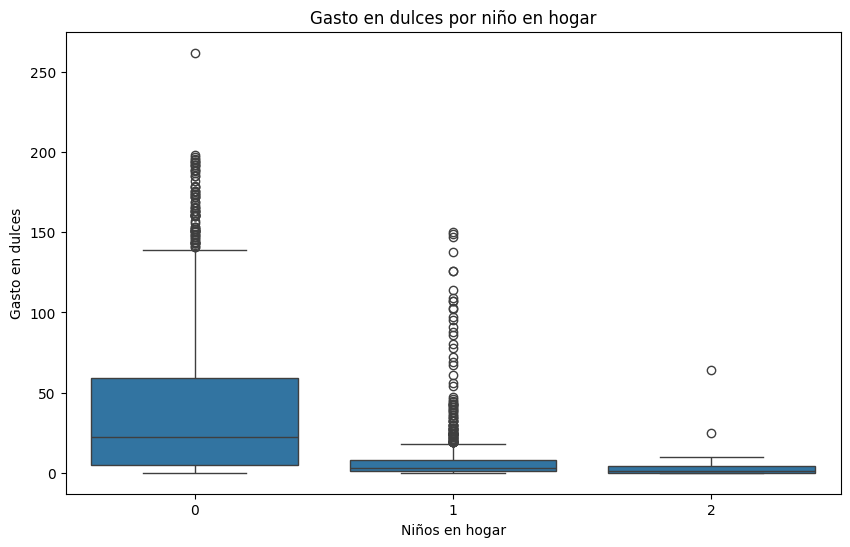

In [62]:
# Cantidad gastada en dulces en los últimos 2 años por número de hijos en el hogar del cliente
plt.figure(figsize=(10, 6))
sns.boxplot(x='Kidhome', y='MntSweetProducts', data=df)
plt.title('Gasto en dulces por niño en hogar')
plt.xlabel('Niños en hogar')
plt.ylabel('Gasto en dulces')
plt.show()

**¿Las rentas bajas aceptan mejor las ofertas? - NO en campaña, pero SÍ se hacen más compras con descuento**

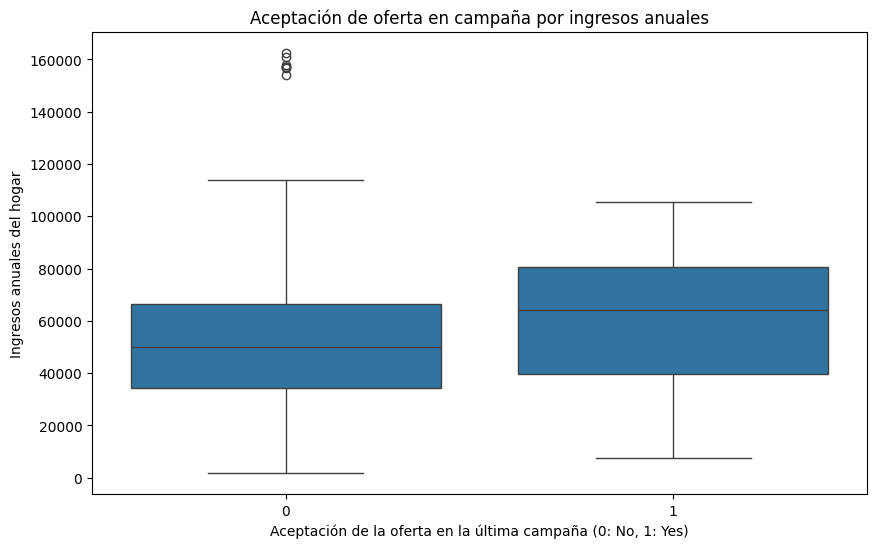

In [63]:
# Ingresos anuales del hogar del cliente por la aceptación de la oferta en la última campaña
plt.figure(figsize=(10, 6))
sns.boxplot(x='Response', y='Income', data=df)
plt.title('Aceptación de oferta en campaña por ingresos anuales')
plt.xlabel('Aceptación de la oferta en la última campaña (0: No, 1: Yes)')
plt.ylabel('Ingresos anuales del hogar')
plt.show()

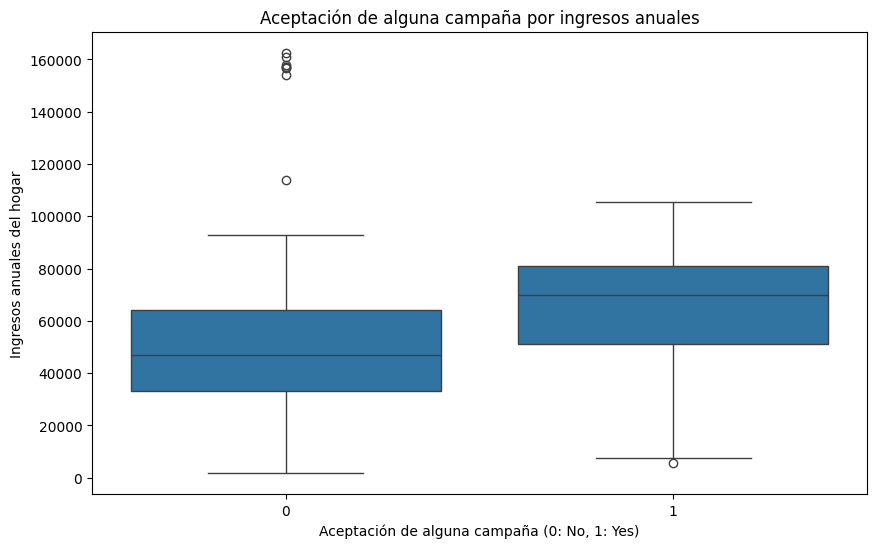

In [64]:
# Ingresos anuales del hogar del cliente por la aceptación de alguna campaña
plt.figure(figsize=(10, 6))
sns.boxplot(x='AcceptedCmp', y='Income', data=df)
plt.title('Aceptación de alguna campaña por ingresos anuales')
plt.xlabel('Aceptación de alguna campaña (0: No, 1: Yes)')
plt.ylabel('Ingresos anuales del hogar')
plt.show()

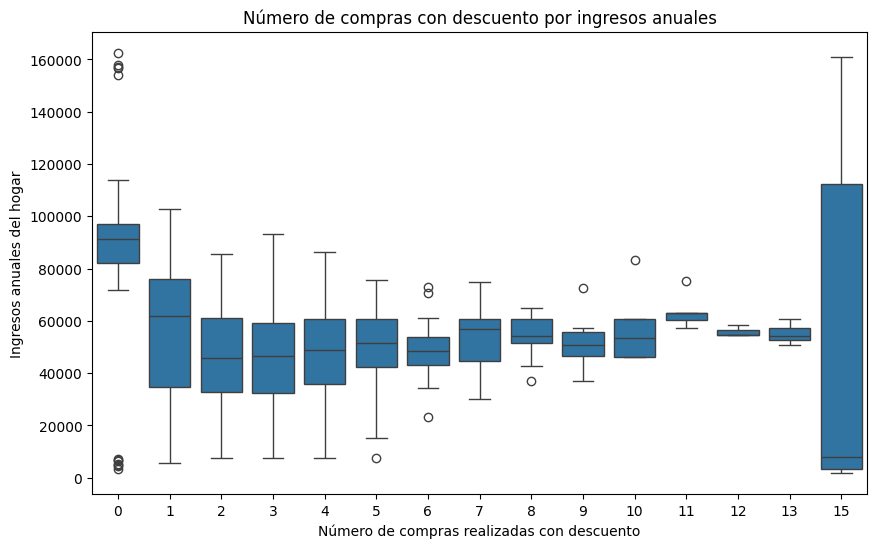

In [65]:
# Ingresos anuales del hogar del cliente por el número de compras realizadas con descuento
plt.figure(figsize=(10, 6))
sns.boxplot(x='NumDealsPurchases', y='Income', data=df)
plt.title('Número de compras con descuento por ingresos anuales')
plt.xlabel('Número de compras realizadas con descuento')
plt.ylabel('Ingresos anuales del hogar')
plt.show()

In [66]:
# Filtrar el DataFrame donde NumDealsPurchases es 15
filtered_df = df[df['NumDealsPurchases'] == 15]

# Calcular la media de la columna Income en el DataFrame filtrado
mean_income = filtered_df['Income'].mean()

print(f"La media de ingresos anuales donde el número de copras con descuento es el máximo: {mean_income}")

La media de ingresos anuales donde el número de copras con descuento es el máximo: 57369.0


**¿Las personas mayores se quejan más? - Muy poco**

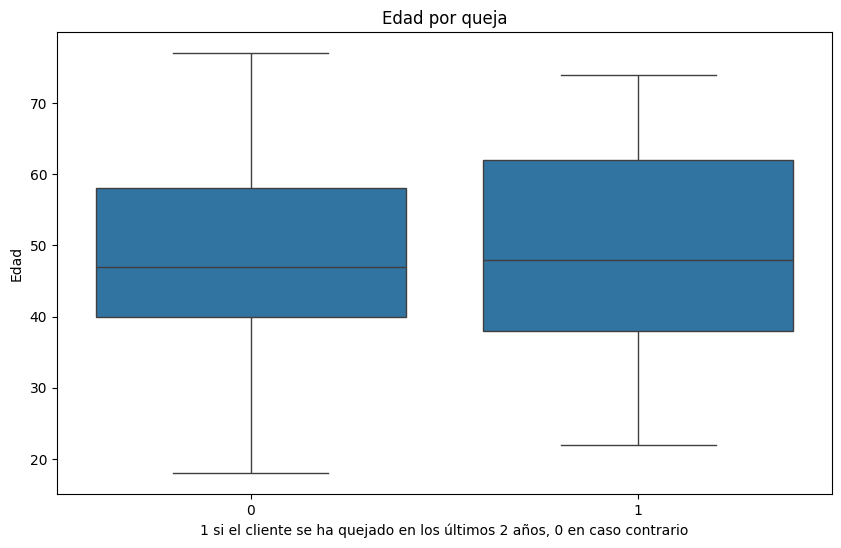

In [67]:
# Edad de nacimiento por queja en los últimos 2 años
plt.figure(figsize=(10, 6))
sns.boxplot(x='Complain', y='Age', data=df)
plt.title('Edad por queja')
plt.xlabel('1 si el cliente se ha quejado en los últimos 2 años, 0 en caso contrario')
plt.ylabel('Edad')
plt.show()

### Distribución de compras con descuento por nivel educativo - NO es significativo

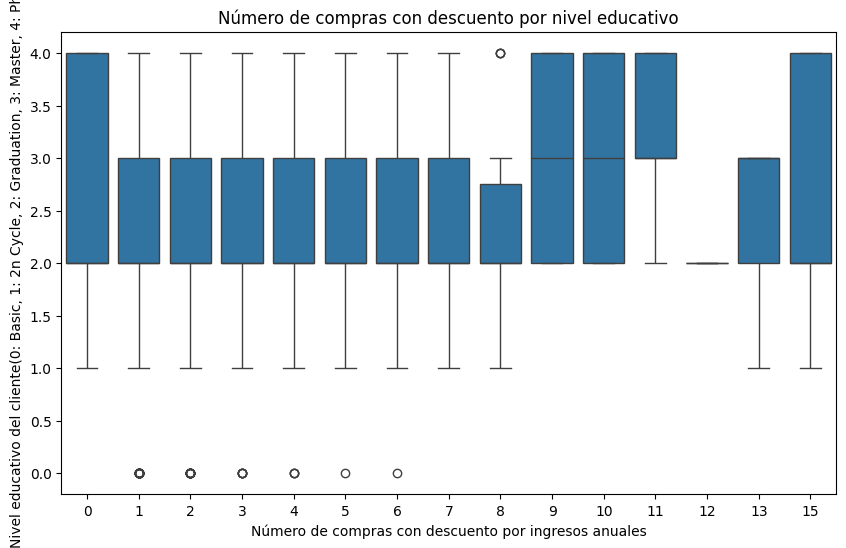

In [68]:
# Educación por el número de compras realizadas con descuento
plt.figure(figsize=(10, 6))
sns.boxplot(x='NumDealsPurchases', y='Education', data=df)
plt.title('Número de compras con descuento por nivel educativo')
plt.xlabel('Número de compras con descuento por ingresos anuales')
plt.ylabel('Nivel educativo del cliente(0: Basic, 1: 2n Cycle, 2: Graduation, 3: Master, 4: PhD)')
plt.show()

### Relación entre antigüedad del cliente y la aceptación de la oferta en la última campaña - Hay una relación clara: Cuanto más antigüo, más confianza y mejor aceptación de las campañas

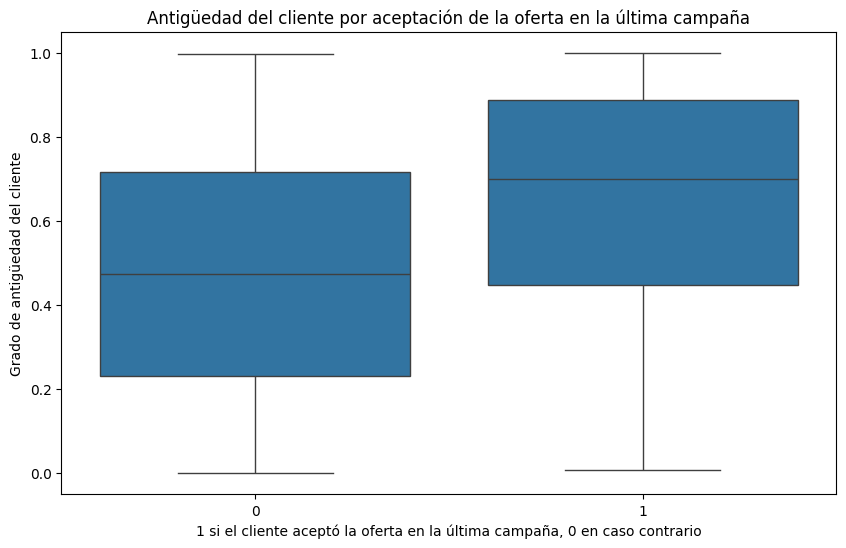

In [69]:
# Antigüedad del cliente por la aceptación de la oferta en la última campaña
plt.figure(figsize=(10, 6))
sns.boxplot(x='Response', y='Seniority', data=df)
plt.title('Antigüedad del cliente por aceptación de la oferta en la última campaña')
plt.xlabel('1 si el cliente aceptó la oferta en la última campaña, 0 en caso contrario')
plt.ylabel('Grado de antigüedad del cliente')
plt.show()

### Pero NO hay relación entre antigüedad del cliente y la aceptación de alguna campaña

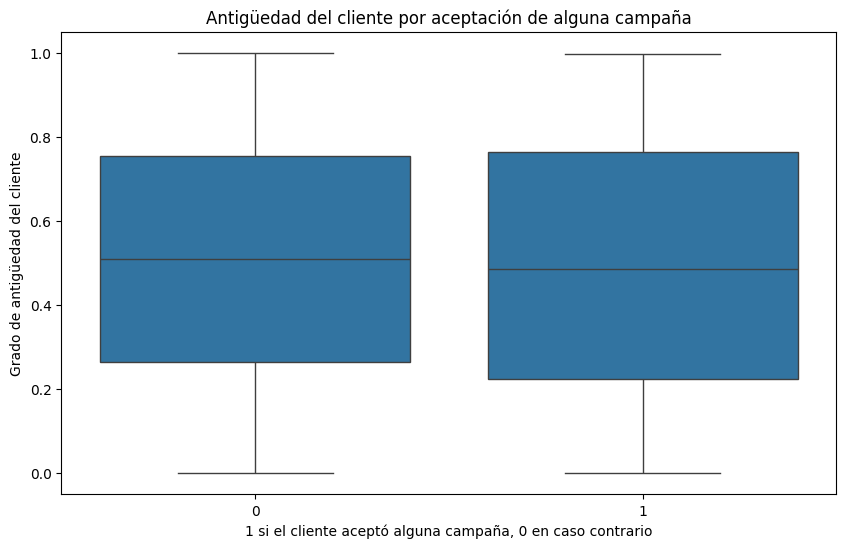

In [70]:
# Antigüedad del cliente por la aceptación de alguna campaña
plt.figure(figsize=(10, 6))
sns.boxplot(x='AcceptedCmp', y='Seniority', data=df)
plt.title('Antigüedad del cliente por aceptación de alguna campaña')
plt.xlabel('1 si el cliente aceptó alguna campaña, 0 en caso contrario')
plt.ylabel('Grado de antigüedad del cliente')
plt.show()

### Impacto de cada campaña en la antigüedad del cliente

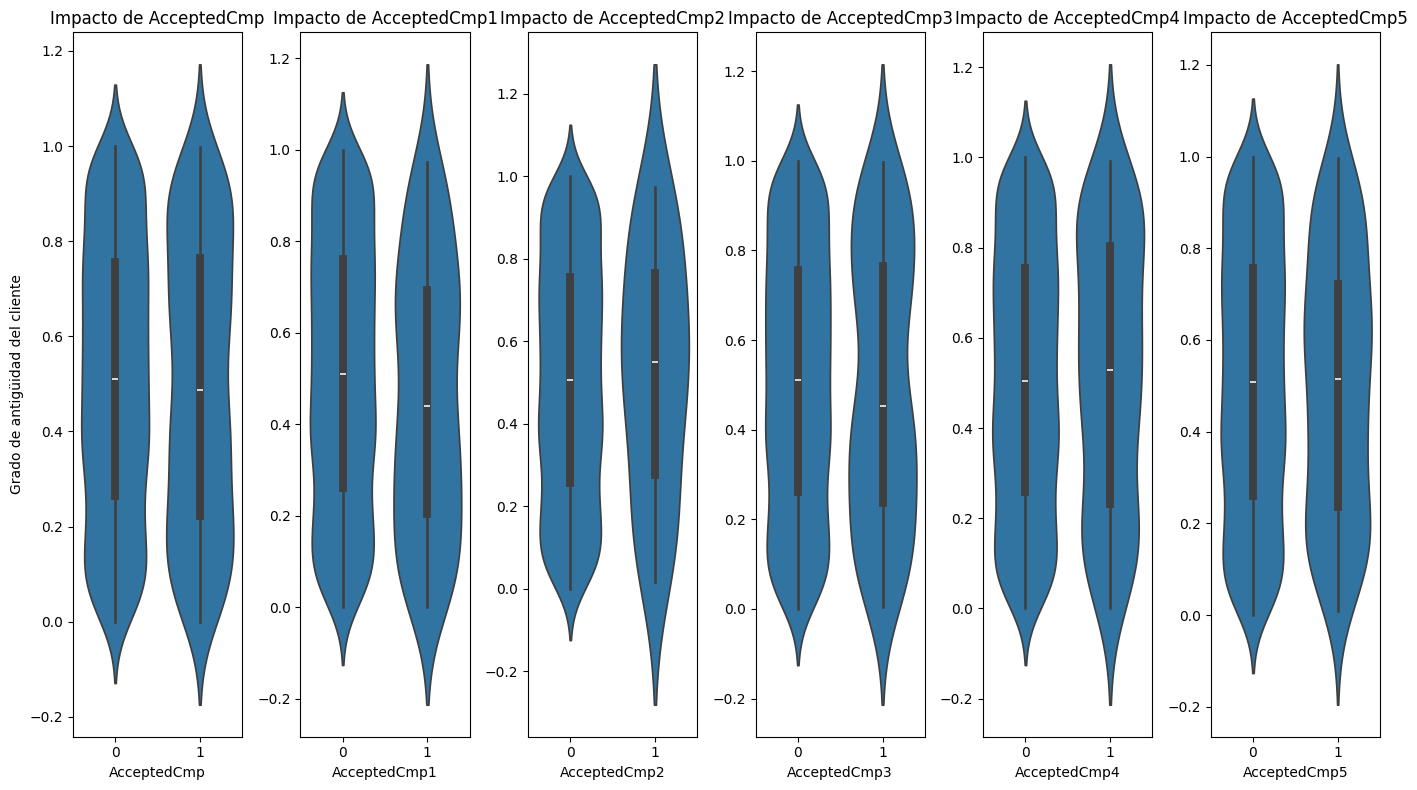

In [71]:
# Crear una lista de columnas de campañas
campaign_columns = ['AcceptedCmp', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

# Configurar la figura
plt.figure(figsize=(14, 8))

# Crear un gráfico de violín para cada campaña
for i, column in enumerate(campaign_columns, 1):
    plt.subplot(1, 6, i)
    sns.violinplot(x=column, y='Seniority', data=df, inner='box')
    plt.title(f'Impacto de {column}')
    plt.xlabel(column)
    plt.ylabel('Grado de antigüidad del cliente' if i == 1 else '')

plt.tight_layout()
plt.show()

### ¿El sueldo es equiparable al nivel educativo? - Claramente SÍ

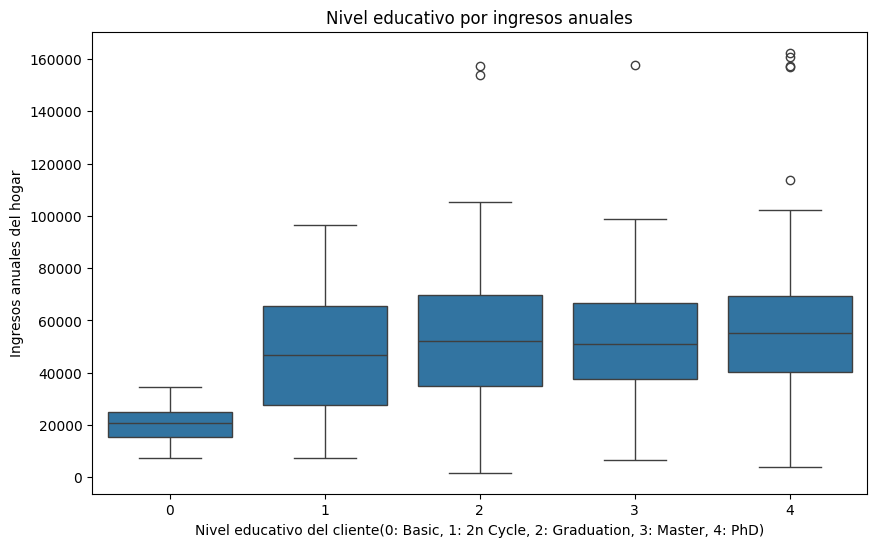

In [72]:
# Ingresos anuales del hogar por nivel educativo
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='Income', data=df)
plt.title('Nivel educativo por ingresos anuales')
plt.xlabel('Nivel educativo del cliente(0: Basic, 1: 2n Cycle, 2: Graduation, 3: Master, 4: PhD)')
plt.ylabel('Ingresos anuales del hogar')
plt.show()

### Relación entre la edad y los ingresos anuales del hogar - No hay relación, pero hay menos ingresos bajos para los mayores

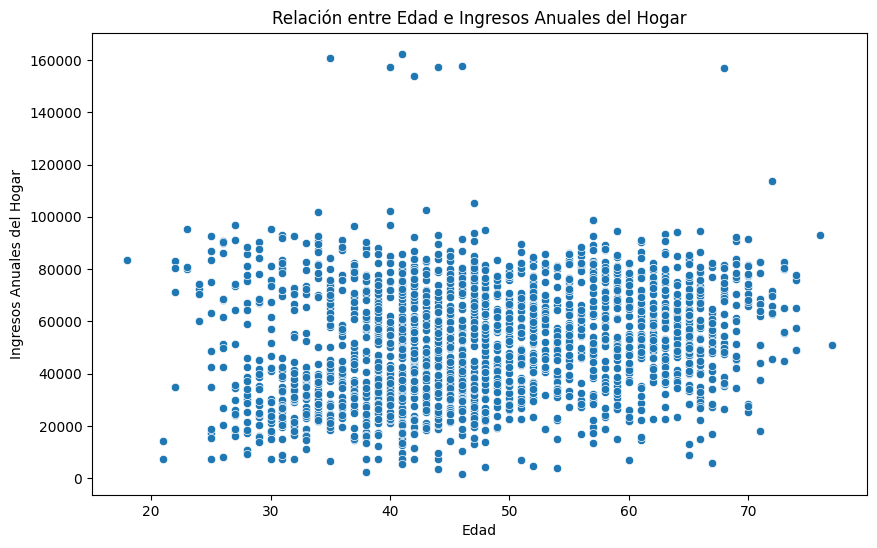

In [73]:
# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Income', data=df)

# Añadir títulos y etiquetas
plt.title('Relación entre Edad e Ingresos Anuales del Hogar')
plt.xlabel('Edad')
plt.ylabel('Ingresos Anuales del Hogar')

# Mostrar el gráfico
plt.show()

# Mapa de Calor Correlaciones

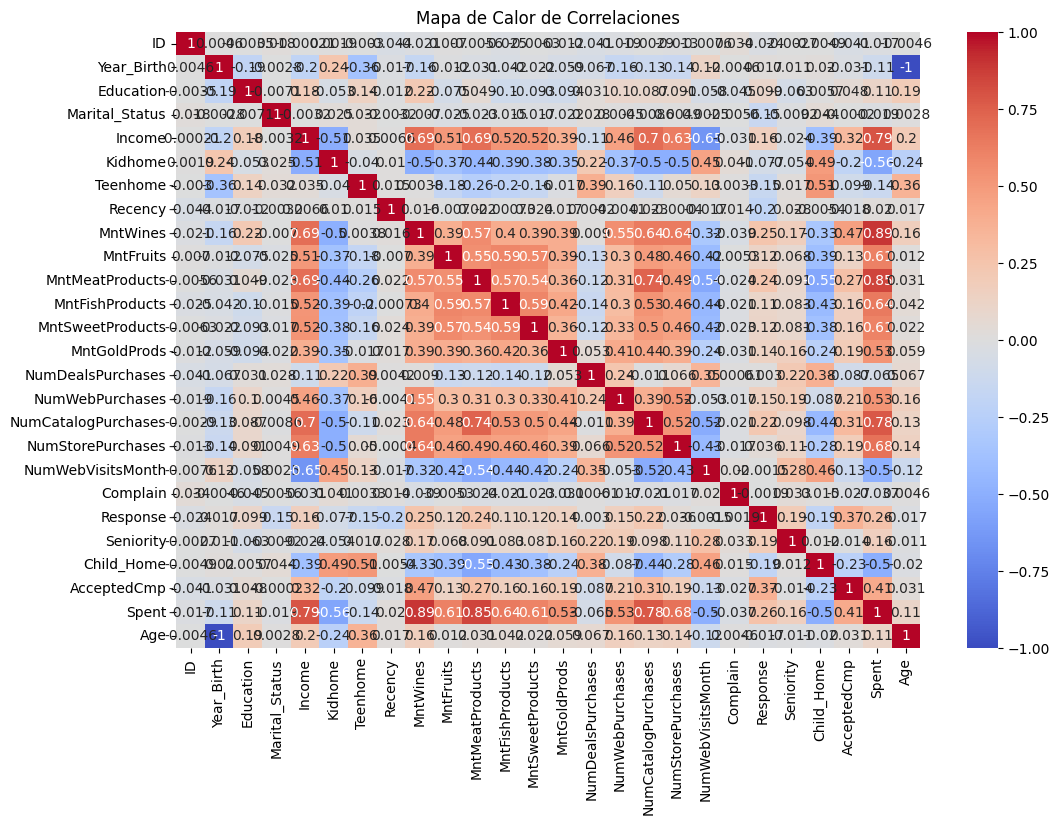

In [74]:
# Lista de columnas a excluir
columns_to_exclude = ['Days', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

# Crear un nuevo DataFrame excluyendo las columnas especificadas
df_filtered = df.drop(columns=columns_to_exclude)

# Generar la matriz de correlación
corr_matrix = df_filtered.corr(numeric_only=True)

# Crear el mapa de calor de correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlaciones')
plt.show()

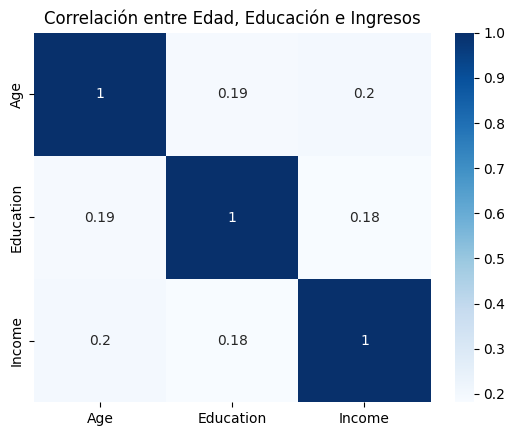

In [75]:
plt.title('Correlación entre Edad, Educación e Ingresos')
sns.heatmap(data= df[['Age', 'Education', 'Income']].corr(), annot= True, cmap='Blues')
plt.show()

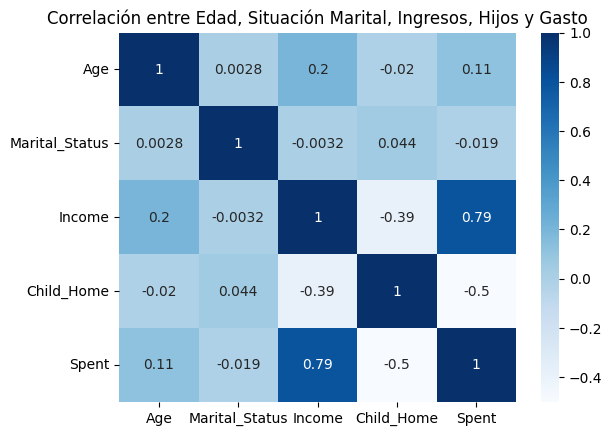

In [76]:
plt.title('Correlación entre Edad, Situación Marital, Ingresos, Hijos y Gasto')
sns.heatmap(data= df[['Age', 'Marital_Status','Income', 'Child_Home', 'Spent']].corr(), annot= True, cmap='Blues')
plt.show()

### Existe una buena correlación de 0,79 entre Ingresos y Gasto

## Ranking de las 10 mejores correlaciones

In [77]:
import numpy as np

# Generar la matriz de correlación excluyendo las columnas especificadas
correlation_matrix = df.drop(columns=columns_to_exclude).corr(numeric_only=True)

# Filtrar la matriz triangular superior
triu = correlation_matrix.where(~np.tril(np.ones(correlation_matrix.shape)).astype(bool))

# Obtener las correlaciones más cercanas a 1 o -1 (positivas y negativas)
best_correlations = triu.unstack().sort_values(ascending=False)

# Eliminar autocorrelaciones
best_correlations = best_correlations[best_correlations.index != best_correlations.name]

# Seleccionar las 10 mejores correlaciones
top_correlations = best_correlations.head(10)

# Mostrar las 10 mejores correlaciones
print("Las 10 mejores correlaciones:")
print(top_correlations)

Las 10 mejores correlaciones:
Spent                MntWines               0.893482
                     MntMeatProducts        0.846130
                     Income                 0.792362
                     NumCatalogPurchases    0.780546
NumCatalogPurchases  MntMeatProducts        0.735253
                     Income                 0.696262
MntMeatProducts      Income                 0.692767
MntWines             Income                 0.688300
Spent                NumStorePurchases      0.675343
                     MntFishProducts        0.642657
dtype: float64


In [78]:
#import seaborn

#seaborn.pairplot(df)
# to show
#plt.show()

In [79]:
#!pip install ydata-profiling

In [80]:
#from ydata_profiling import ProfileReport

# Generar el reporte de pandas-profiling
#profile = ProfileReport(df, title="Reporte de Análisis Exploratorio de Datos", explorative=True)

# Mostrar el reporte
#profile.to_notebook_iframe()

# ML - Clasificación

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el archivo CSV
df = pd.read_csv('../data/raw/marketing_campaign.csv')

## Nuestra variable objetivo será AcceptedCmp: 0 no se ha aceptado ninguna campaña y 1 se ha aceptado al menos 1 de las 5 campañas

In [82]:
# 1. Correlación con el Target
correlation_matrix = df.corr(numeric_only=True)
correlation_with_target = correlation_matrix['AcceptedCmp'].sort_values(ascending=False)
correlation_with_target

AcceptedCmp            1.000000
AcceptedCmp4           0.553782
AcceptedCmp3           0.551957
AcceptedCmp5           0.548292
AcceptedCmp1           0.510624
MntWines               0.465034
Spent                  0.412466
Response               0.367401
Income                 0.315024
NumCatalogPurchases    0.313291
MntMeatProducts        0.274626
AcceptedCmp2           0.229464
NumWebPurchases        0.213228
MntGoldProds           0.190782
NumStorePurchases      0.186765
MntFishProducts        0.160046
MntSweetProducts       0.159584
MntFruits              0.126553
Education              0.047823
Age                    0.030778
Marital_Status        -0.000198
Days                  -0.013751
Seniority             -0.013751
Recency               -0.017745
Complain              -0.027016
Year_Birth            -0.030778
ID                    -0.041206
NumDealsPurchases     -0.086570
Teenhome              -0.099415
NumWebVisitsMonth     -0.125986
Kidhome               -0.203024
Child_Ho

## Selección de variables X e Y

Determinamos que las variables con una correlación entre 0.2 y -0.2 quedarán excluidas de nuestro entrenamiento, ya que se encuentran entorno al 0 y parecen que no afectan a la variable objetivo y así aligeramos el proceso de entrenamiento.

# Training
Cogeremos el 20% para test y el 80% para training

# RESUMEN

## Código limpio

No hacemos GridSearchCV, ya que tardaría mucho en entrenar el modelo

# RandomizedSearchCV

In [83]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from scipy.stats import uniform, randint
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos
url = '../data/raw/marketing_campaign.csv'
df = pd.read_csv(url, delimiter='\t')

# Eliminar columnas innecesarias
df.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True)

# Limpieza de Datos (Data Cleaning)
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['Days'] = (df['Dt_Customer'] - df['Dt_Customer'].min()).dt.days
df['Days'] = df['Days'].max() - df['Days']

scaler = MinMaxScaler()
df['Seniority'] = scaler.fit_transform(df[['Days']])
df.dropna(subset=['Income'], inplace=True)
df['Income'] = df['Income'].astype('int64')

df.loc[df['Year_Birth'] == 1893, 'Year_Birth'] = 1993
df.loc[df['Year_Birth'] == 1899, 'Year_Birth'] = 1999
mean_year_birth = df[df['Year_Birth'] != 1900]['Year_Birth'].mean()
df.loc[df['Year_Birth'] == 1900, 'Year_Birth'] = round(mean_year_birth)

resumen = df['Income'].describe()
IQR = resumen['75%'] - resumen['25%']
limite_inferior = resumen['25%'] - 1.5 * IQR
limite_superior = resumen['75%'] + 1.5 * IQR
ingresos_validos = df[(df['Income'] >= limite_inferior) & (df['Income'] <= limite_superior)]
media_sin_outliers = ingresos_validos['Income'].mean()
df.loc[df['ID'] == 9432, 'Income'] = media_sin_outliers

# Transformación de variables categóricas
df = df.copy()  # Crear una copia del DataFrame original
label_map_education = {"Basic": 0, "2n Cycle": 1, "Graduation": 2, "Master": 3, "PhD": 4}
df["Education"] = df["Education"].map(label_map_education).astype(int)

df['Marital_Status'] = df['Marital_Status'].replace('Alone', 'Single')
df = df[~df['Marital_Status'].isin(['Absurd', 'YOLO'])]

label_map_marital = {"Single": 0, "Divorced": 0, "Widow": 0, "Together": 1, "Married": 1}
df["Marital_Status"] = df["Marital_Status"].map(label_map_marital).astype(int)

# Creación de nuevas variables
df['Child_Home'] = df.apply(lambda x: 1 if (x['Kidhome'] == 1 or x['Teenhome'] == 1) else 0, axis=1)
df['AcceptedCmp'] = df.apply(lambda x: 1 if (x['AcceptedCmp1'] == 1 or x['AcceptedCmp2'] == 1 or x['AcceptedCmp3'] == 1 or x['AcceptedCmp4'] == 1 or x['AcceptedCmp5'] == 1) else 0, axis=1)
df['Spent'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntGoldProds', 'MntSweetProducts']].sum(axis=1)
df['Age'] = 2017 - df['Year_Birth']

# Selección de variables
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['AcceptedCmp']
filtered_correlations = correlation_with_target[(correlation_with_target > 0.2) | (correlation_with_target < -0.2)].sort_values(ascending=False)
features = filtered_correlations.index[filtered_correlations.index != 'AcceptedCmp'].tolist()
X = df[features]
y = df['AcceptedCmp']

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelado y evaluación
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'Neural Network': MLPClassifier()
}

param_distributions = {
    'Logistic Regression': {'C': uniform(0.1, 10)},
    'KNN': {'n_neighbors': randint(1, 30)},
    'Random Forest': {'n_estimators': randint(50, 200), 'max_features': ['sqrt', 'log2'], 'max_depth': randint(2, 10)},
    'SVM': {'C': uniform(0.1, 10), 'gamma': uniform(0.01, 1)},
    'Neural Network': {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)], 'activation': ['tanh', 'relu'], 'solver': ['sgd', 'adam'], 'alpha': uniform(0.0001, 0.05), 'learning_rate': ['constant','adaptive']}
}

results = {}
best_models = {}

for model_name, model in models.items():
    param_dist = param_distributions[model_name]
    search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, scoring='roc_auc', n_jobs=-1, cv=5, random_state=42)
    search.fit(X_train, y_train)
    best_model = search.best_estimator_
    best_params = search.best_params_

    y_pred = best_model.predict(X_test)
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]

    results[model_name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_pred_proba),
        'Best Params': best_params
    }
    best_models[model_name] = best_model

# Convertir a tipo float para evitar errores
results_df = pd.DataFrame(results).T
results_df['Accuracy'] = results_df['Accuracy'].astype(float)
results_df['Precision'] = results_df['Precision'].astype(float)
results_df['Recall'] = results_df['Recall'].astype(float)
results_df['F1 Score'] = results_df['F1 Score'].astype(float)
results_df['ROC AUC'] = results_df['ROC AUC'].astype(float)

print(results_df)

# Determinar el mejor modelo basado en Accuracy, Precision, Recall, F1 Score y ROC AUC
best_accuracy_model = results_df['Accuracy'].idxmax()
best_precision_model = results_df['Precision'].idxmax()
best_recall_model = results_df['Recall'].idxmax()
best_f1_model = results_df['F1 Score'].idxmax()
best_roc_auc_model = results_df['ROC AUC'].idxmax()

print(f"Mejor modelo basado en Accuracy: {best_accuracy_model}")
print(f"Mejor modelo basado en Precision: {best_precision_model}")
print(f"Mejor modelo basado en Recall: {best_recall_model}")
print(f"Mejor modelo basado en F1 Score: {best_f1_model}")
print(f"Mejor modelo basado en ROC AUC: {best_roc_auc_model}")
print(f"Mejores hiperparámetros para {best_accuracy_model}: {results_df.at[best_accuracy_model, 'Best Params']}")
print(f"Mejores hiperparámetros para {best_precision_model}: {results_df.at[best_precision_model, 'Best Params']}")
print(f"Mejores hiperparámetros para {best_recall_model}: {results_df.at[best_recall_model, 'Best Params']}")
print(f"Mejores hiperparámetros para {best_f1_model}: {results_df.at[best_f1_model, 'Best Params']}")
print(f"Mejores hiperparámetros para {best_roc_auc_model}: {results_df.at[best_roc_auc_model, 'Best Params']}")

/tmp/ipykernel_2344/572054415.py:42: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '51633.63813405797' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['ID'] == 9432, 'Income'] = media_sin_outliers
/home/kyke/.var/app/com.visualstudio.code/cache/pypoetry/virtualenvs/marketing-ml-classification-APEHDq7B-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/kyke/.var/app/com.visualstudio.code/cache/pypoetry/

                     Accuracy  Precision    Recall  F1 Score   ROC AUC  \
Logistic Regression  0.914221   0.862069  0.742574  0.797872  0.966099   
KNN                  0.817156   0.717391  0.326733  0.448980  0.738391   
Random Forest        0.997743   1.000000  0.990099  0.995025  0.999971   
SVM                  0.808126   1.000000  0.158416  0.273504  0.688582   
Neural Network       0.769752   0.428571  0.029703  0.055556  0.617089   

                                                           Best Params  
Logistic Regression                          {'C': 1.9340450985343383}  
KNN                                                {'n_neighbors': 17}  
Random Forest        {'max_depth': 8, 'max_features': 'log2', 'n_es...  
SVM                  {'C': 6.875643618422824, 'gamma': 0.0265878289...  
Neural Network       {'activation': 'relu', 'alpha': 0.017728442816...  
Mejor modelo basado en Accuracy: Random Forest
Mejor modelo basado en Precision: Random Forest
Mejor modelo basado en

/home/kyke/.var/app/com.visualstudio.code/cache/pypoetry/virtualenvs/marketing-ml-classification-APEHDq7B-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


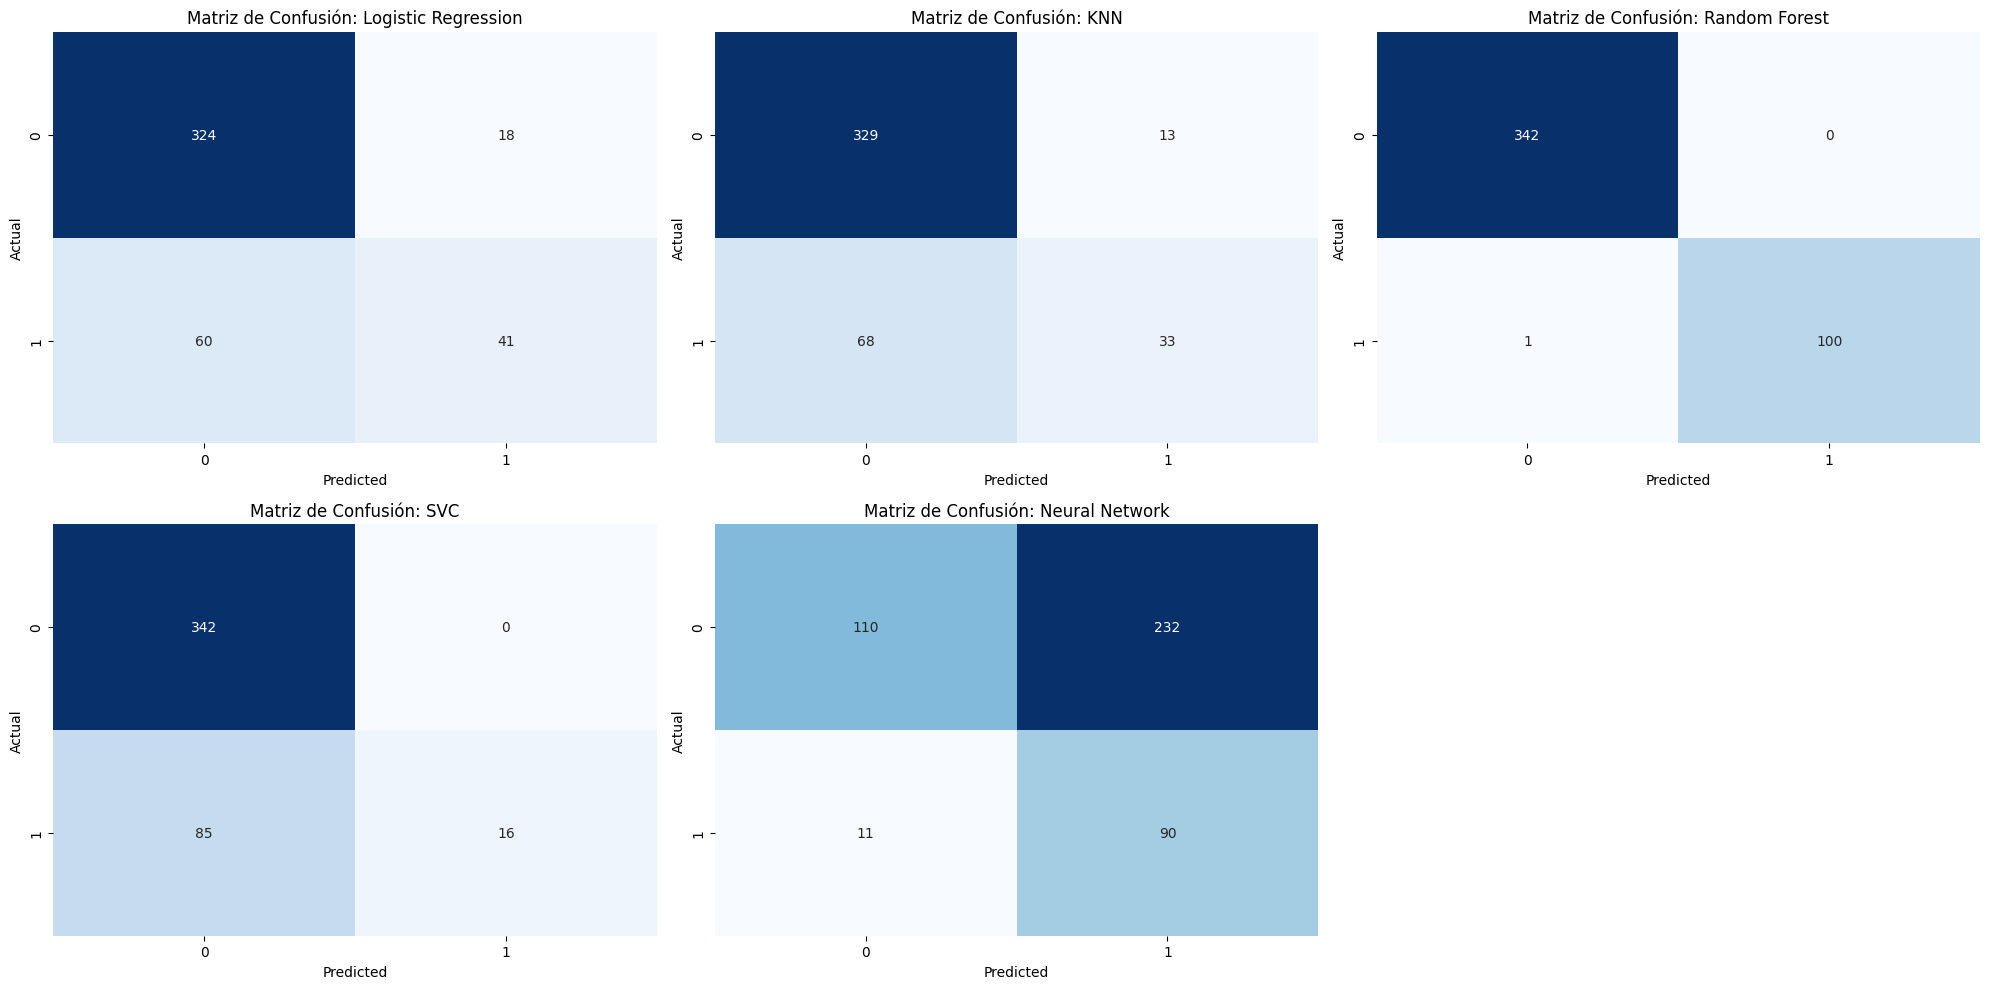

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Inicializar y entrenar modelos
model_lr = LogisticRegression(C=1.9485445552552705)
model_knn = KNeighborsClassifier(n_neighbors=17)
model_rf = RandomForestClassifier(n_estimators=142, max_features='log2', max_depth=8)
model_svc = SVC(C=6.875643618422824, gamma=0.0265878289)
model_nn = MLPClassifier(hidden_layer_sizes=(50,50,50), activation='relu', solver='adam', alpha=0.039093777292)

models = {
    'Logistic Regression': model_lr,
    'KNN': model_knn,
    'Random Forest': model_rf,
    'SVC': model_svc,
    'Neural Network': model_nn
}

# Entrenar modelos y hacer predicciones
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred

# Visualización: Matriz de confusión
plt.figure(figsize=(20, 10))
for i, (name, y_pred) in enumerate(predictions.items(), 1):
    cm = confusion_matrix(y_test, y_pred)
    plt.subplot(2, 3, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=[0, 1], yticklabels=[0, 1])
    plt.title(f'Matriz de Confusión: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()


/home/kyke/.var/app/com.visualstudio.code/cache/pypoetry/virtualenvs/marketing-ml-classification-APEHDq7B-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


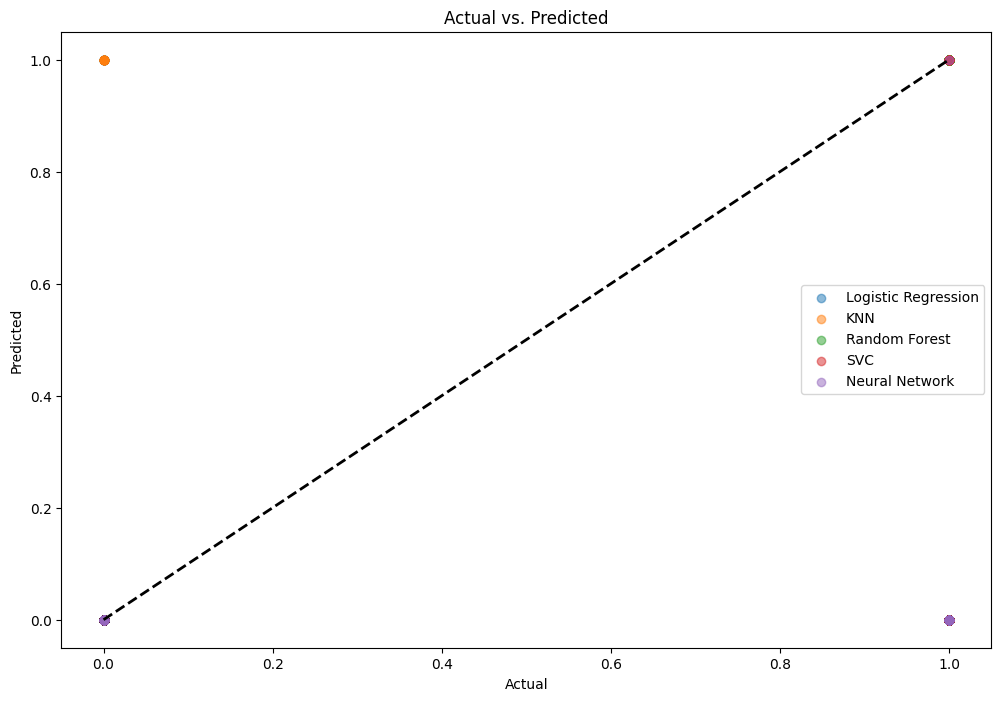

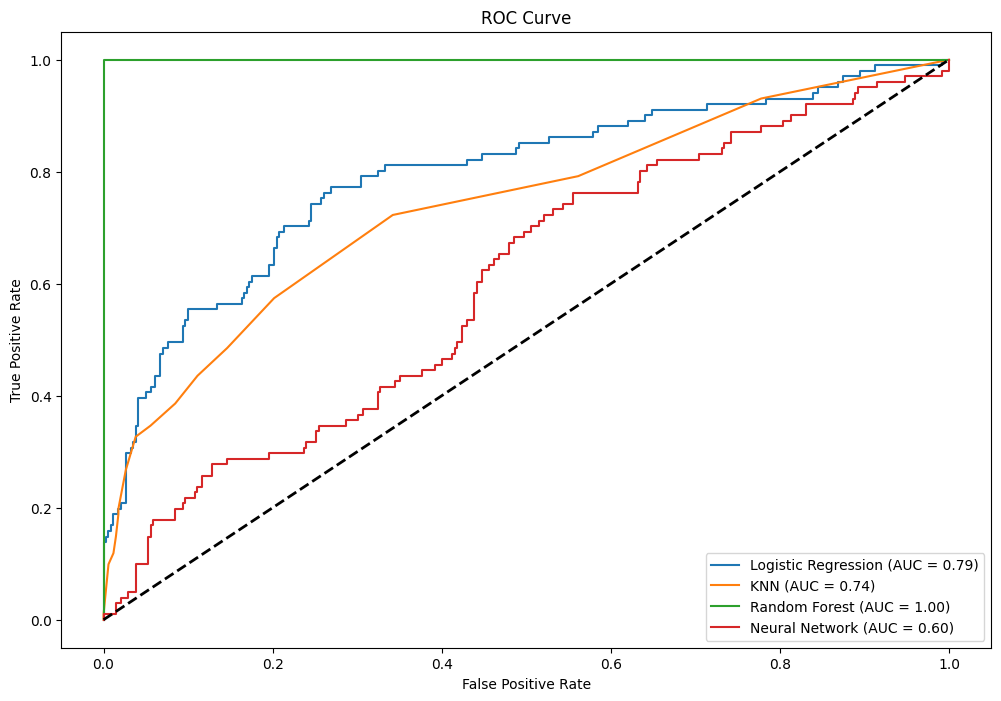

In [85]:
import matplotlib.pyplot as plt

# Inicializar y entrenar modelos
model_lr = LogisticRegression(C=1.9485445552552705)
model_knn = KNeighborsClassifier(n_neighbors=17)
model_rf = RandomForestClassifier(n_estimators=142, max_features='log2', max_depth=8)
model_svc = SVC(C=6.875643618422824, gamma=0.0265878289)
model_nn = MLPClassifier(hidden_layer_sizes=(50,50,50), activation='relu', solver='adam', alpha=0.039093777292)

models = {
    'Logistic Regression': model_lr,
    'KNN': model_knn,
    'Random Forest': model_rf,
    'SVC': model_svc,
    'Neural Network': model_nn
}

# Entrenar modelos y hacer predicciones
predictions = {}
probabilities = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    predictions[name] = y_pred
    probabilities[name] = y_pred_proba

# Visualización: Actual vs. Predicted values
plt.figure(figsize=(12, 8))
for name, y_pred in predictions.items():
    plt.scatter(y_test, y_pred, alpha=0.5, label=name, marker='o')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()

# Visualización de probabilidades (ROC Curve)
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(12, 8))
for name, y_pred_proba in probabilities.items():
    if y_pred_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        auc = roc_auc_score(y_test, y_pred_proba)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Guardar modelo

In [86]:
import pickle

filename = '../models/RandomForestClassifier.pkl'
pickle.dump(model_rf, open(filename, 'wb'))